# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from collections import Counter
import re
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
# Load dataset into pandas dataframe
df = pd.read_csv("../data/train/train.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\levyl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\levyl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\levyl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\levyl\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Display first five rows
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19579 non-null  object
 1   text    19579 non-null  object
 2   author  19579 non-null  object
dtypes: object(3)
memory usage: 459.0+ KB


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

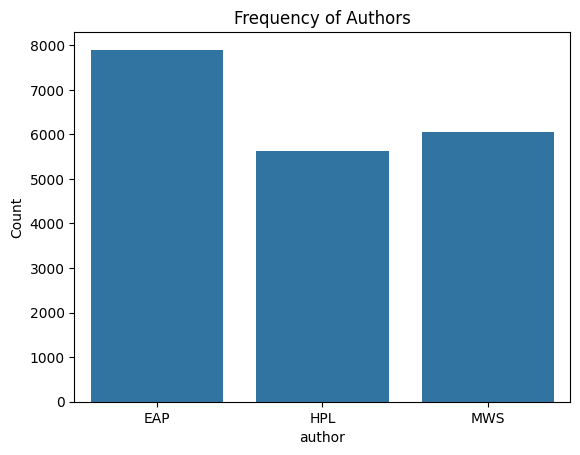

In [5]:
## Display frequency of each author in the dataset 
authors = df["author"]
sns.countplot(x=authors, data=df)
plt.title("Frequency of Authors")
plt.ylabel("Count")
plt.show()

In [6]:
# Add a column for the length of each text
df["text length"] = df["text"].apply(lambda x: len(x))
df["text length"].head()


0    231
1     71
2    200
3    206
4    174
Name: text length, dtype: int64

In [7]:
max_text_length = df["text length"].max()
min_text_length = df["text length"].min()
print(f"The longest text length is: {max_text_length}, the shortest text length is: {min_text_length}")

The longest text length is: 4663, the shortest text length is: 21


In [8]:
df.shape

(19579, 4)

In [9]:
shortest_length_text = df[df["text length"] == 21]
print(shortest_length_text, shortest_length_text.shape)

            id                   text author  text length
302    id20021  I breathed no longer.    EAP           21
831    id18921  Calderon de la Barca.    MWS           21
1023   id16996  He won't do he won't.    EAP           21
1393   id12150  It is still at large.    EAP           21
1704   id18575  Do you hear anything?    EAP           21
2747   id26561  My strength was gone.    MWS           21
2910   id15628  My practice was this.    EAP           21
3076   id21984  This thought creates.    EAP           21
3799   id11709  Did we pass a valley?    MWS           21
4016   id17846  The uproar increases.    EAP           21
4028   id01048  My fame is universal.    EAP           21
4059   id10974  He reaches the grave.    EAP           21
4241   id25742  'Tis berry hebby bug.    EAP           21
5214   id17463  Why the third degree?    HPL           21
6034   id00855  P. Is not God spirit?    EAP           21
6418   id27928  "Sunday, the seventh.    EAP           21
6597   id13508

<Axes: xlabel='text length', ylabel='Count'>

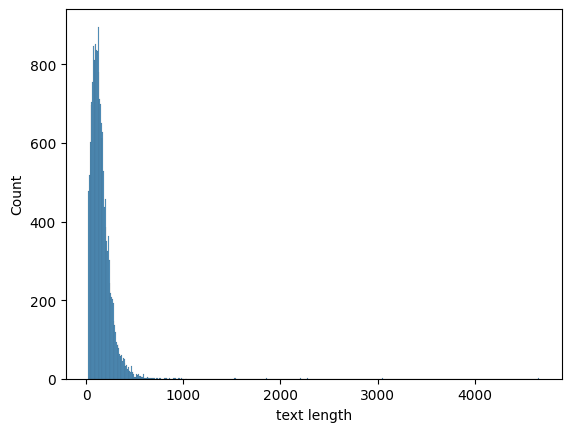

In [10]:
#Display text length distribution

sns.histplot(df["text length"])

<Axes: xlabel='text length', ylabel='Density'>

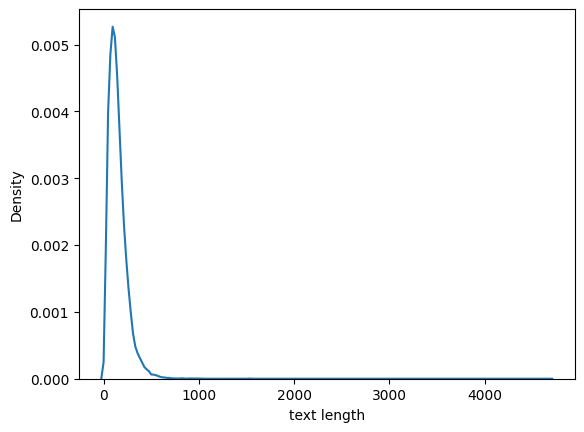

In [11]:
sns.kdeplot(df["text length"])

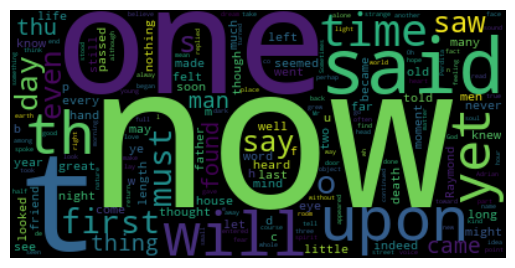

In [12]:

# Create wordcloud from words in dataset before preprocessing
from wordcloud import WordCloud

def create_wordcloud(text, stop_words):
    if stop_words != False:
        wordcloud = WordCloud(stopwords=stop_words).generate(text)
    else:
        wordcloud = WordCloud().generate(text)

    # Display wordcloud
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

text = df["text"].to_string()
create_wordcloud(text=text, stop_words=False)


In [13]:
def plot_word_frequency(words, topn):
    word_freq = Counter(words)
    
    common_words = word_freq.most_common(topn)
    
    words, frequencies = zip(*common_words)
    ## Plot word frequencies
    plt.figure(figsize=(10,8))
    plt.barh(words, frequencies, color="skyblue")
    plt.xlabel("Frequency")
    plt.ylabel("words")
    plt.title("Top 10 Word frequencies")
    plt.gca().invert_yaxis() # So that the highest freqency is at the top
    plt.show()

In [14]:
# Remove punctuation and "th" which is a frequent non word

def remove_punctuation(text):
    tokens = word_tokenize(text)
    non_word_list = ["th", 'h', 'w']
    word_tokens = [re.sub(r'[^\w\s]', '', word) for word in tokens if re.sub(r'[^\w\s]', '', word) and word not in non_word_list]
    return word_tokens

In [15]:
df["clean_text"] = df["text"].apply(lambda x: x.lower())

In [16]:
df["clean_text"] = df["text"].apply(remove_punctuation)
df["clean_text"]

0        [This, process, however, afforded, me, no, mea...
1        [It, never, once, occurred, to, me, that, the,...
2        [In, his, left, hand, was, a, gold, snuff, box...
3        [How, lovely, is, spring, As, we, looked, from...
4        [Finding, nothing, else, not, even, gold, the,...
                               ...                        
19574    [I, could, have, fancied, while, I, looked, at...
19575    [The, lids, clenched, themselves, together, as...
19576    [Mais, il, faut, agir, that, is, to, say, a, F...
19577    [For, an, item, of, news, like, this, it, stri...
19578    [He, laid, a, gnarled, claw, on, my, shoulder,...
Name: clean_text, Length: 19579, dtype: object

In [17]:
df["clean_text_length"] = df["clean_text"].apply(len)

In [18]:
print(df["clean_text_length"].max(), df["clean_text_length"].min())

862 2


In [19]:
result = df[df["clean_text_length"] == 2]

result

,id,text,author,text length,clean_text,clean_text_length
4961,id17197,""" Odenheimer, restaurateur.",EAP,27,"[Odenheimer, restaurateur]",2
6553,id26479,h'ehye n'grkdl'lh. . .,HPL,22,"[hehye, ngrkdllh]",2
6936,id22015,"""PIQUANT EXPRESSIONS.",EAP,21,"[PIQUANT, EXPRESSIONS]",2
9250,id23640,"""EXTRAORDINARY MURDERS.",EAP,23,"[EXTRAORDINARY, MURDERS]",2


In [20]:
# def remove_stopwords(text):
#     stop_words = set(stopwords.words("english"))
#     clean_text = [word for word in text if word not in stop_words]
#     return clean_text
stop_words = set(stopwords.words("english"))

In [21]:
df["clean_text"] = df["clean_text"].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df["clean_text"]

0        [process, however, afforded, means, ascertaini...
1        [never, occurred, fumbling, might, mere, mistake]
2        [left, hand, gold, snuff, box, capered, hill, ...
3        [lovely, spring, looked, Windsor, Terrace, six...
4        [Finding, nothing, else, even, gold, Superinte...
                               ...                        
19574    [could, fancied, looked, eminent, landscape, p...
19575                    [lids, clenched, together, spasm]
19576    [Mais, il, faut, agir, say, Frenchman, never, ...
19577    [item, news, like, strikes, us, coolly, received]
19578    [laid, gnarled, claw, shoulder, seemed, shakin...
Name: clean_text, Length: 19579, dtype: object

In [22]:
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    # Lemmatize each word
    lemmatized_tokens =[lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [23]:
df["lemmatized_text"] = df["clean_text"].apply(lemmatize_text)
df["lemmatized_text"]

0        [process, however, afforded, mean, ascertainin...
1        [never, occurred, fumbling, might, mere, mistake]
2        [left, hand, gold, snuff, box, capered, hill, ...
3        [lovely, spring, looked, Windsor, Terrace, six...
4        [Finding, nothing, else, even, gold, Superinte...
                               ...                        
19574    [could, fancied, looked, eminent, landscape, p...
19575                     [lid, clenched, together, spasm]
19576    [Mais, il, faut, agir, say, Frenchman, never, ...
19577      [item, news, like, strike, u, coolly, received]
19578    [laid, gnarled, claw, shoulder, seemed, shakin...
Name: lemmatized_text, Length: 19579, dtype: object

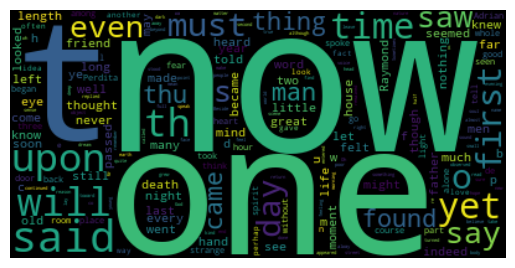

In [24]:
# Generate wordcloud after stop word removal
word_tokens = df["lemmatized_text"].to_string()
create_wordcloud(text, stop_words=False)

In [25]:
clean_words = df["lemmatized_text"].tolist()

In [26]:
word_list = []
for row in clean_words:
    word_list.extend(row)


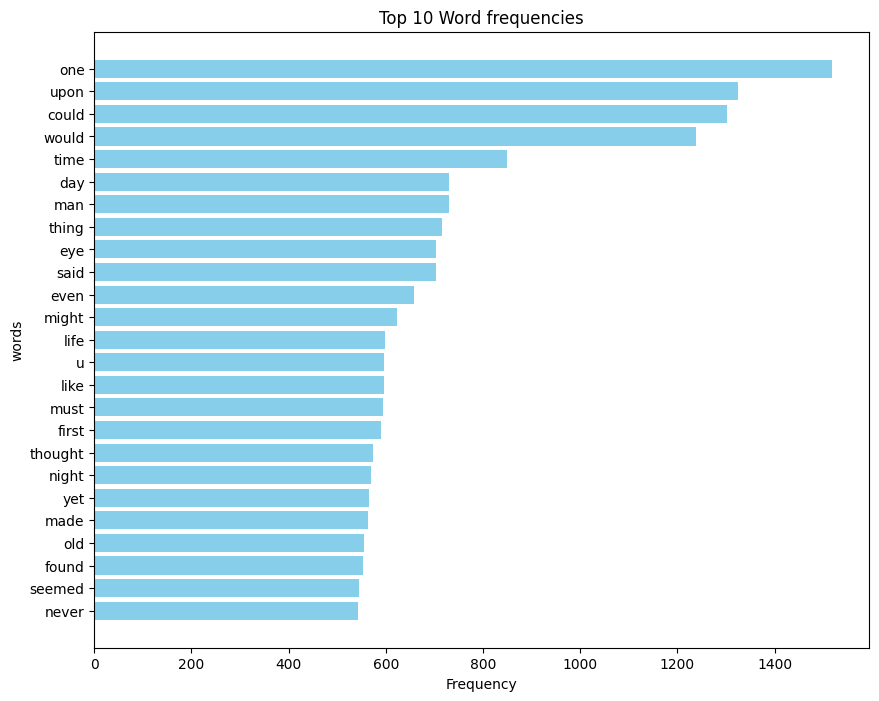

In [28]:
plot_word_frequency(word_list, 25)